importing libraries

In [ ]:
import os
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

 loading all .wav audio files from a specified directory into a dictionary, where each key is the filename and the value is a tuple containing the audio data and its sampling rate, using the librosa library for audio processing

In [ ]:
# Path to the train dataset
train_audio_path = "C:/Users/Udayan Saha/OneDrive/Desktop/project_intern/dataset/audios_train"


# Get all .wav files in the train directory
audio_files = [f for f in os.listdir(train_audio_path) if f.endswith(".wav")]

# Dictionary to store audio data
audio_data = {}

# Load each audio file
for file in audio_files:
    file_path = os.path.join(train_audio_path, file)
    audio, sr = librosa.load(file_path, sr=16000)  # Load audio with 16kHz sampling rate
    audio_data[file] = (audio, sr)

print(f"Loaded {len(audio_data)} audio files from {train_audio_path}")


Loaded 444 audio files from C:/Users/Udayan Saha/OneDrive/Desktop/project_intern/dataset/audios_train


The task involves loading .wav audio files from a specified directory, extracting various audio features (MFCC, Mel Spectrogram, Chroma Features, and Zero-Crossing Rate) using the librosa library, and visualizing the MFCC and Mel Spectrogram of the first audio file using Matplotlib

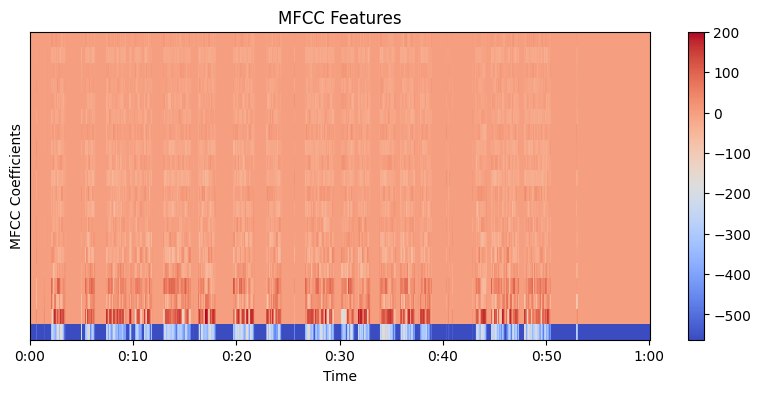

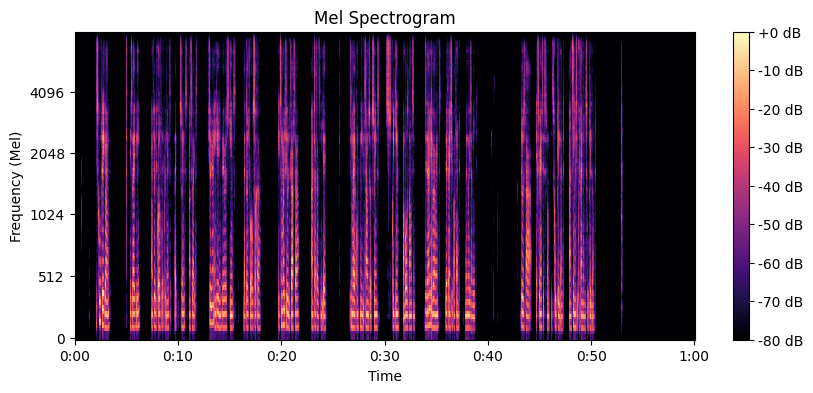

In [ ]:
# Path to audio files
train_audio_path = r"C:\Users\Udayan Saha\OneDrive\Desktop\project_intern\dataset\audios_train"

# List all .wav files
audio_files = [f for f in os.listdir(train_audio_path) if f.endswith(".wav")]

# Function to extract audio features
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=16000)  # Load audio with 16kHz sampling rate
    
    #MFCC Features (20 coefficients)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
    
    #Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    
    #Chroma Features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    #Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(audio)
    
    return mfcc, mel_spectrogram, chroma, zcr

# Process first audio file for visualization
first_audio_path = os.path.join(train_audio_path, audio_files[0])
mfcc, mel_spec, chroma, zcr = extract_features(first_audio_path)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis="time", sr=16000)
plt.colorbar()
plt.title("MFCC Features")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=16000, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency (Mel)")
plt.show()


loading a CSV file containing labels for audio data, extracting various audio features (mean MFCC, mean Mel Spectrogram, mean Chroma Features, and mean Zero-Crossing Rate) from .wav audio files using the librosa library, and returning a concatenated array of these features for further analysis or model training.

In [ ]:
# Path to dataset
train_audio_path = r"C:\Users\Udayan Saha\OneDrive\Desktop\project_intern\dataset\audios_train"
train_csv_path = r"C:\Users\Udayan Saha\OneDrive\Desktop\project_intern\dataset\train.csv"

# Load the train.csv file to get labels
train_df = pd.read_csv(train_csv_path)

# Function to extract features
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=16000)  # Load audio with 16kHz sampling rate
    
    #MFCC Features (20 coefficients)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
    mfcc_mean = np.mean(mfcc, axis=1)  # Take the mean across time

    #Mel Spectrogram (Convert to Log Scale)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    mel_spectrogram_mean = np.mean(librosa.power_to_db(mel_spectrogram, ref=np.max), axis=1)

    #Chroma Features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)

    #Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(audio)
    zcr_mean = np.mean(zcr)

    # Combine all features
    features = np.concatenate([mfcc_mean, mel_spectrogram_mean, chroma_mean, [zcr_mean]])
    
    return features

processing all audio files listed in a CSV file by extracting audio features (MFCC, Mel Spectrogram, Chroma Features, and Zero-Crossing Rate) using a defined function, storing these features along with their corresponding labels in a DataFrame, and then saving the resulting DataFrame to a new CSV file named features.csv for further analysis or model training

In [ ]:
#Process all audio files
feature_list = []
labels = []

for _, row in tqdm(train_df.iterrows(), total=len(train_df)):
    file_name = row["filename"]  
    label = row["label"]  
    
    file_path = os.path.join(train_audio_path, file_name)
    
    if os.path.exists(file_path): 
        features = extract_features(file_path)
        feature_list.append(features)
        labels.append(label)

# Convert to DataFrame
feature_columns = [f"mfcc_{i}" for i in range(20)] + [f"mel_{i}" for i in range(128)] + \
                  [f"chroma_{i}" for i in range(12)] + ["zcr"]
df_features = pd.DataFrame(feature_list, columns=feature_columns)
df_features["label"] = labels  # Add target labels

df_features.to_csv(r"C:\Users\Udayan Saha\OneDrive\Desktop\project_intern\dataset\features.csv", index=False)
print("Feature extraction completed! Saved to features.csv.")


100%|██████████| 444/444 [02:33<00:00,  2.89it/s]

✅ Feature extraction completed! Saved to features.csv.


Model Training pipeline

In [ ]:
# After extracting all features into a list of dicts or DataFrame
df_features = pd.DataFrame(feature_list)  # This includes filename, features, and labels
df_features.to_csv("features.csv", index=False)


In [ ]:
df = pd.read_csv("features.csv")
print(df.head())  # Print the first few rows of the DataFrame
print(df.columns)  # Print the column names

            0           1          2          3          4         5  \
0 -485.992737   50.111820   8.837244   9.500427   1.973223  2.533967   
1 -418.862366   24.498129   0.983082   3.577540 -11.690801 -2.484139   
2 -468.621979   55.773441  -6.867956  12.415868   2.657126 -3.901442   
3 -395.975739   83.706886  -9.338621  22.242304   2.223831 -4.640110   
4 -300.150665  104.442299 -19.612244   7.221632  -6.562626 -9.136395   

           6          7         8         9  ...       151       152  \
0  -6.811783   1.587861 -4.828947 -3.566348  ...  0.385070  0.366579   
1  -9.580399  -0.941148 -7.578836  1.941515  ...  0.200011  0.252043   
2  -1.949762  -3.627633 -3.994594  0.676666  ...  0.382613  0.400385   
3   0.991509  -5.542060 -6.253079 -0.231806  ...  0.274388  0.300117   
4 -10.110367 -10.232144 -5.131830 -7.595556  ...  0.372161  0.374039   

        153       154       155       156       157       158       159  \
0  0.365797  0.386050  0.431676  0.488134  0.450937  0.3955

In [ ]:
# Manually define column names
mfcc_cols = [f"mfcc_{i}" for i in range(20)]
mel_cols = [f"mel_{i}" for i in range(128)]
chroma_cols = [f"chroma_{i}" for i in range(12)]
zcr_col = ["zcr"]
label_col = ["label"]

columns = mfcc_cols + mel_cols + chroma_cols + zcr_col + label_col

# Load the CSV and assign the column names
df = pd.read_csv("features.csv", header=None, names=columns)

print(df.head())
print(df.columns)


       mfcc_0     mfcc_1    mfcc_2     mfcc_3     mfcc_4    mfcc_5    mfcc_6  \
0    0.000000   1.000000  2.000000   3.000000   4.000000  5.000000  6.000000   
1 -485.992737  50.111820  8.837244   9.500427   1.973223  2.533967 -6.811783   
2 -418.862366  24.498129  0.983082   3.577540 -11.690801 -2.484139 -9.580399   
3 -468.621979  55.773441 -6.867956  12.415868   2.657126 -3.901442 -1.949762   
4 -395.975739  83.706886 -9.338621  22.242304   2.223831 -4.640110  0.991509   

     mfcc_7    mfcc_8    mfcc_9  ...    chroma_4    chroma_5    chroma_6  \
0  7.000000  8.000000  9.000000  ...  152.000000  153.000000  154.000000   
1  1.587861 -4.828947 -3.566348  ...    0.366579    0.365797    0.386050   
2 -0.941148 -7.578836  1.941515  ...    0.252043    0.343331    0.292057   
3 -3.627633 -3.994594  0.676666  ...    0.400385    0.439891    0.491702   
4 -5.542060 -6.253079 -0.231806  ...    0.300117    0.327251    0.371899   

     chroma_7    chroma_8    chroma_9   chroma_10   chroma_11 

In [ ]:
print("Shape of df:", df.shape)
print("Number of columns in df:", len(df.columns))

Shape of df: (445, 162)
Number of columns in df: 162


In [ ]:
df = pd.read_csv("dataset/features.csv")

In [21]:
df.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,zcr,label
0,-485.992737,50.111820,8.837244,9.500427,1.973223,2.533967,-6.811783,1.587861,-4.828947,-3.566348,...,0.366579,0.365797,0.386050,0.431676,0.488134,0.450937,0.395509,0.419360,0.143139,1.0
1,-418.862366,24.498129,0.983082,3.577540,-11.690801,-2.484139,-9.580399,-0.941148,-7.578836,1.941515,...,0.252043,0.343331,0.292057,0.271461,0.239763,0.238772,0.294297,0.347124,0.105385,1.5
2,-468.621979,55.773441,-6.867956,12.415868,2.657126,-3.901442,-1.949762,-3.627633,-3.994594,0.676666,...,0.400385,0.439891,0.491702,0.561989,0.550700,0.538195,0.539023,0.498829,0.132682,1.5
3,-395.975739,83.706886,-9.338621,22.242304,2.223831,-4.640110,0.991509,-5.542060,-6.253079,-0.231806,...,0.300117,0.327251,0.371899,0.450599,0.502114,0.436085,0.438533,0.395023,0.094663,1.5
4,-300.150665,104.442299,-19.612244,7.221632,-6.562626,-9.136395,-10.110367,-10.232144,-5.131830,-7.595556,...,0.374039,0.286604,0.304620,0.347836,0.316900,0.278287,0.296289,0.416023,0.136809,2.0


In [22]:
print(df.describe())

           mfcc_0      mfcc_1      mfcc_2      mfcc_3      mfcc_4      mfcc_5  \
count  444.000000  444.000000  444.000000  444.000000  444.000000  444.000000   
mean  -352.127218   80.852704    6.027064   17.948038   -5.078332   -1.656509   
std     52.846266   25.114523   15.935366   12.440092   12.269504   13.669447   
min   -544.599426   11.200498  -41.145294  -31.829496  -48.253670  -35.411766   
25%   -382.882698   65.743351   -4.328055    9.710668  -13.229497  -10.646002   
50%   -343.120514   81.371750    5.823804   17.351804   -5.042569   -2.774846   
75%   -313.597626   98.149874   14.586148   25.850945    3.589105    4.871623   
max   -238.258865  142.610352   55.930519   58.365692   32.462929   43.233433   

           mfcc_6      mfcc_7      mfcc_8      mfcc_9  ...    chroma_4  \
count  444.000000  444.000000  444.000000  444.000000  ...  444.000000   
mean    -6.794128   -4.385462   -4.481640   -4.123165  ...    0.339592   
std     10.006040    8.717096    8.081817    7.2

In [ ]:
print(df["label"].value_counts())

label
5.0    110
3.0     87
2.0     70
4.5     58
4.0     52
2.5     40
3.5     23
1.5      3
1.0      1
Name: count, dtype: int64


In [ ]:
# Remove classes with fewer than 2 samples
df = df.groupby("label").filter(lambda x: len(x) > 1)

# Prepare features and labels again
X = df.drop(columns=["label"])
y = df["label"]

# Now do a stratified train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Model Testing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = pd.read_csv("dataset/features.csv")

# Remove rare label values (< 2 samples)
df = df.groupby("label").filter(lambda x: len(x) > 1)

# Split features and labels
X = df.drop(columns=["label"])
y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

RandomForestRegressor MSE and R-squre

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.7642367977528091
R² Score: 0.38452344313964704


XGBRegressor MSE and R-squre

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.7885116931361952
R² Score: 0.3649737053193226


visualizing the top 10 most important features from a trained model by plotting a horizontal bar chart, where the feature importances are displayed along the x-axis and the corresponding feature indices are labeled on the y-axis, providing insights into which features contribute most to the model's predictions.

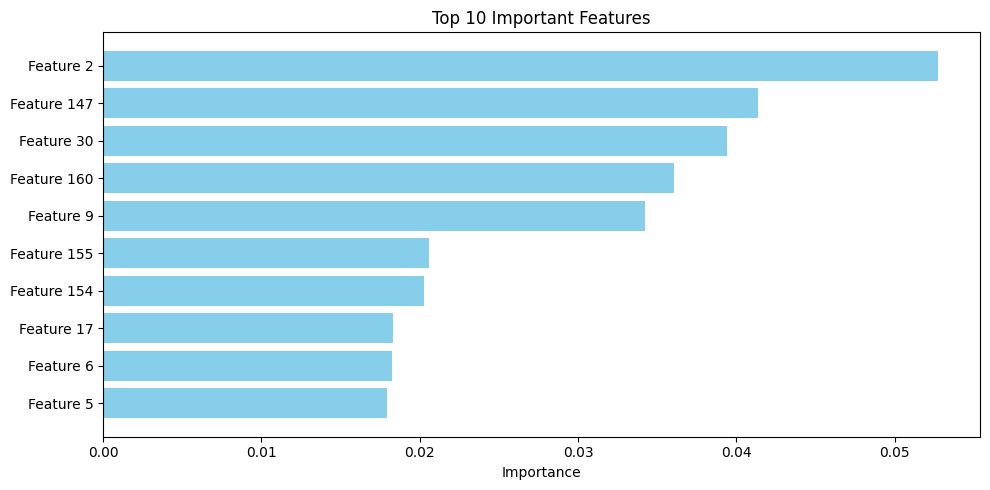

In [33]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 5))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], color="skyblue")
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


RandomForestRegressor MSE and R-squre with top 10 features

In [37]:
top_features = [2, 147, 30, 160, 9, 155, 154, 17, 6, 5]
X_train_top = X_train.iloc[:, top_features]
X_test_top = X_test.iloc[:, top_features]

model = RandomForestRegressor(random_state=42)
model.fit(X_train_top, y_train)
y_pred = model.predict(X_test_top)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.7558213483146068
R²: 0.39130080829647695


training multiple regression models (Gradient Boosting, XGBoost, and Support Vector Regression) on a training dataset, making predictions on a test dataset, and then evaluating the performance of each model using Mean Squared Error (MSE) and R² score, with results printed for each model.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "SVR": SVR()
}

for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"MSE: {mse:.4f}")
    print(f"R² : {r2:.4f}")



Gradient Boosting
MSE: 0.8484
R² : 0.3167

XGBoost
MSE: 0.9279
R² : 0.2527

SVR
MSE: 1.2479
R² : -0.0050


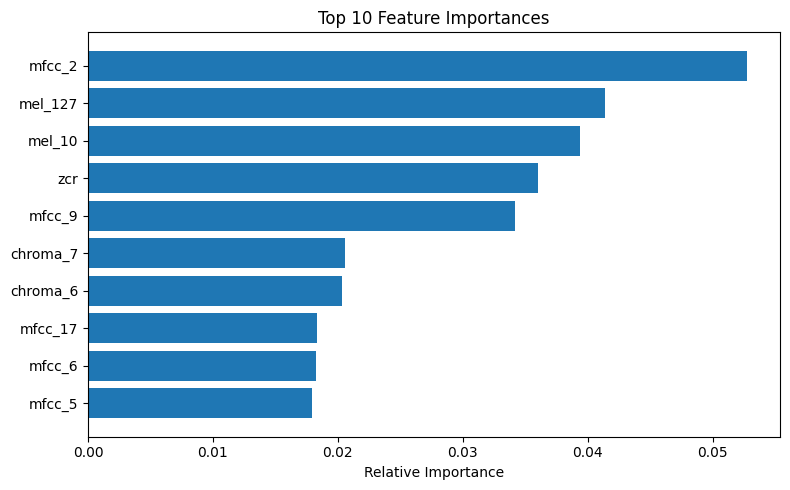

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Use model you've already trained (must be tree-based)
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8, 5))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=5)
search.fit(X_train_top, y_train)
best_model = search.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Define the hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Set up the Random Forest model
rf = RandomForestRegressor(random_state=42)

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,               # Number of combinations to try
    cv=5,                    # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,               # Use all cores
    random_state=42
)

# Fit on training data
random_search.fit(X_train_top, y_train)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_top)

print("Best Params:", random_search.best_params_)
print("Tuned MSE:", mean_squared_error(y_test, y_pred))
print("Tuned R²:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Tuned MSE: 0.755453442985507
Tuned R²: 0.3915971001079557


In [ ]:
# Step 1: Full feature matrix and labels (using all 162 columns)
X_all = df.drop(columns=["label"])
y_all = df["label"]

# Step 2: Use only top 10 features
top_features = [2, 147, 30, 160, 9, 155, 154, 17, 6, 5]
X_all_top = X_all.iloc[:, top_features]

In [61]:
# Step 3: Retrain model on the full dataset using top 10 features
final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
final_model.fit(X_all_top, y_all)


RandomForestRegressor(max_depth=30, min_samples_split=5, random_state=42)

loads a CSV file containing test data, specifically extracting the filenames from the 'filename' column into a list for further processing or analysis

In [52]:
import pandas as pd

test_df = pd.read_csv("dataset/test.csv")  # Contains only 'filename' column
filenames = test_df['filename'].tolist()


In [57]:
test_features = []

for fname in filenames:
    path = f"dataset/audios_test/{fname}"  # adjust folder path as needed
    feats = extract_features(path)
    test_features.append(feats)

test_features_df = pd.DataFrame(test_features)


In [ ]:
#Full feature matrix and labels (using all 162 columns)
X_all = df.drop(columns=["label"])
y_all = df["label"]

# Use only top 10 features
top_features = [2, 147, 30, 160, 9, 155, 154, 17, 6, 5]
X_all_top = X_all.iloc[:, top_features]

In [ ]:
# Step 3: Retrain model on the full dataset using top 10 features
final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
final_model.fit(X_all_top, y_all)

RandomForestRegressor(max_depth=30, min_samples_split=5, random_state=42)

In [ ]:
print("Train features shape:", X_train.shape)
print("Test features shape:", test_features_df.shape)

Train features shape: (354, 161)
Test features shape: (195, 27)


The task involves defining a function to extract a comprehensive set of audio features from an audio file using the librosa library. The features extracted include:

1. MFCCs: Mean and standard deviation of Mel-frequency cepstral coefficients. 

2. Delta MFCCs: Mean and standard deviation of the first derivative of MFCCs.

3. Chroma Features: Mean and standard deviation of chroma features.

4. Spectral Contrast: Mean and standard deviation of spectral contrast features.

5. Tonnetz: Mean and standard deviation of tonnetz features.

6. Zero-Crossing Rate (ZCR): Mean of the zero-crossing rate.

7. Root Mean Square Error (RMSE): Mean and standard deviation of the root mean square error.

8. Spectral Centroid: Mean and standard deviation of the spectral centroid.

9. Spectral Bandwidth: Mean and standard deviation of the spectral bandwidth.

10. Spectral Rolloff: Mean and standard deviation of the spectral rolloff.

The function returns a list of these features, which can be used for further analysis or model training.

In [ ]:
import librosa
import numpy as np

def extract_features(filepath):
    y, sr = librosa.load(filepath, sr=None)
    features = []

    # MFCCs (30 x 2 = 60)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)
    features.extend(np.mean(mfccs, axis=1))
    features.extend(np.std(mfccs, axis=1))

    # Delta MFCCs (30 x 2 = 60)
    delta_mfccs = librosa.feature.delta(mfccs)
    features.extend(np.mean(delta_mfccs, axis=1))
    features.extend(np.std(delta_mfccs, axis=1))

    # Chroma (12 x 2 = 24)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features.extend(np.mean(chroma, axis=1))
    features.extend(np.std(chroma, axis=1))

    # Spectral Contrast (7 x 2 = 14)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    features.extend(np.mean(contrast, axis=1))
    features.extend(np.std(contrast, axis=1))

    # Tonnetz (6 x 2 = 12)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    features.extend(np.mean(tonnetz, axis=1))
    features.extend(np.std(tonnetz, axis=1))

    # ZCR (1)
    zcr = librosa.feature.zero_crossing_rate(y)
    features.append(np.mean(zcr))

    # RMSE (2)
    rmse = librosa.feature.rms(y=y)
    features.append(np.mean(rmse))
    features.append(np.std(rmse))

    # Spectral Centroid (2)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features.append(np.mean(centroid))
    features.append(np.std(centroid))

    # Spectral Bandwidth (2)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features.append(np.mean(bandwidth))
    features.append(np.std(bandwidth))

    # Spectral Rolloff (2)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features.append(np.mean(rolloff))
    features.append(np.std(rolloff))

    return features


The task involves extracting audio features from a list of test audio files using the previously defined extract_features function. For each filename in the filenames list, the function constructs the file path, extracts the features, and appends them to a list. Finally, the list of extracted features is converted into a DataFrame (test_features_df), which can be used for further analysis or model evaluation.

In [ ]:
test_features = []

for fname in filenames:
    path = f"dataset/audios_test/{fname}" 
    feats = extract_features(path)
    test_features.append(feats)

test_features_df = pd.DataFrame(test_features)

In [73]:
print("Test features shape:", test_features_df.shape)


Test features shape: (195, 179)


In [74]:
top_features = [2, 147, 30, 160, 9, 155, 154, 17, 6, 5]

In [75]:
X_test_final = test_features_df.iloc[:, top_features]


In [ ]:
test_preds = final_model.predict(X_test_final)

c:\Users\Udayan Saha\anaconda3\envs\secvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


predicts labels for the test data using the trained final_model, prepares a submission DataFrame containing the filenames and their corresponding predicted labels, and saves this DataFrame to a CSV file named "sample_submission.csv" for submission or further analysis.

In [ ]:
submission = pd.DataFrame({
    'filename': filenames,
    'value': test_preds
})

submission.to_csv("sample_submission.csv", index=False)